In [3]:
import pandas as pd
import numpy as np

In [5]:
from sklearn import metrics
from math import sqrt
import pandas as pd
data_list=[]
data_list.append(pd.read_csv('./maml_label.csv'))
data_list.append(pd.read_csv('./mlp_label.csv'))
data_list.append(pd.read_csv('./few_maml_label.csv'))
data_list.append(pd.read_csv('./few_mlp_label.csv'))
result_list=[]
label=['MAML','MLP','Few-MAML','Few-MLP']
for i in range(len(data_list)):
    y_true = data_list[i]['GroundTruth']
    y_pred = data_list[i]['Predict']
    dic={}
    # 计算均方误差（MSE）
    dic['method'] = label[i]
    dic['mse'] = metrics.mean_squared_error(y_true, y_pred)
    # 计算平均绝对误差（MAE）
    dic['mae'] = metrics.mean_absolute_error(y_true, y_pred)
    # 计算R平方值
    dic['r2'] = metrics.r2_score(y_true, y_pred)
    dic['rmse'] = sqrt(metrics.mean_squared_error(y_true, y_pred))
    # 计算解释方差得分（explained variance score）
    dic['evs'] = metrics.explained_variance_score(y_true, y_pred)
    result_list.append(dic)
pd.DataFrame(result_list)

,method,mse,mae,r2,rmse,evs
0,MAML,3.157627e+07,4554.547163,0.896004,5619.276965,0.964050
1,MLP,4.886367e+07,5807.095355,0.839068,6990.255356,0.949985
2,Few-MAML,1.035941e+08,8647.283575,0.658815,10178.120825,0.905086
3,Few-MLP,1.683059e+08,11210.919403,0.445688,12973.276284,0.859628


In [7]:
pd.DataFrame(result_list).to_csv('./result.csv',index=False)

In [ ]:
from sklearn import metrics
from math import sqrt
import pandas as pd
data_list=[]
data_list.append(pd.read_csv('./maml_label.csv'))
# data_list.append(pd.read_csv('./MAML_label.csv'))
# data_list.append(pd.read_csv('./MAML_ood_label.csv'))
# data_list.append(pd.read_csv('./MLP_ood_label.csv'))
result_list=[]
label=['MLP','MAML','MAML Generalization','MLP Generalization']
for i in range(len(data_list)):
    y_true = data_list[i]['GroundTruth']
    y_pred = data_list[i]['Predict']
    dic={}
    # 计算均方误差（MSE）
    dic['method'] = label[i]
    dic['mse'] = metrics.mean_squared_error(y_true, y_pred)
    # 计算平均绝对误差（MAE）
    dic['mae'] = metrics.mean_absolute_error(y_true, y_pred)
    # 计算R平方值
    dic['r2'] = metrics.r2_score(y_true, y_pred)
    dic['rmse'] = sqrt(metrics.mean_squared_error(y_true, y_pred))
    # 计算解释方差得分（explained variance score）
    dic['evs'] = metrics.explained_variance_score(y_true, y_pred)
    result_list.append(dic)
result_list

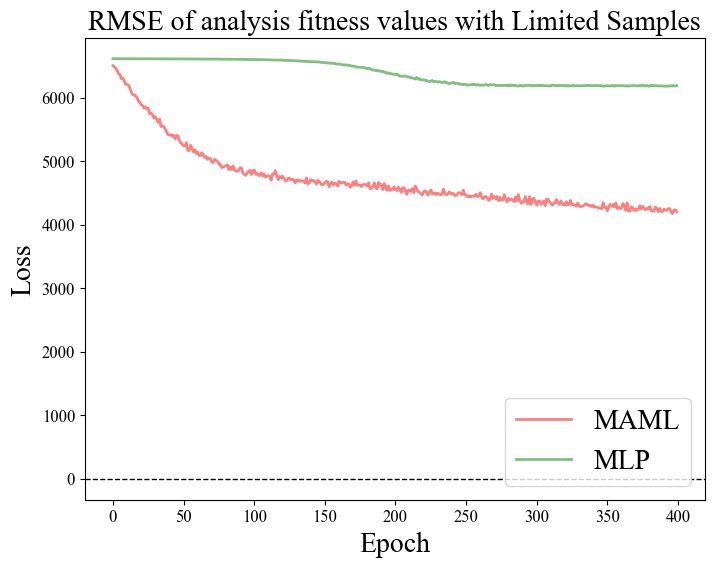

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, 400)
y1 = data1['rmse']
y2 = data2['rmse']

# 计算移动平均值
window_size = 10
window = np.ones(window_size) / float(window_size)
y_smooth = np.convolve(y1, window, 'same')

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y1, alpha=0.5, color='red', linewidth=2, label='MAML')
ax.plot(x, y2, alpha=0.5, color='green', linewidth=2, label='MLP')
# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('RMSE of analysis fitness values with Limited Samples', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='lower right', fontsize=20)

plt.show()

In [5]:
data=pd.read_csv('./MAML_label.csv')
data

,Predict,GroundTruth
0,13539.714,14252.853
1,65590.005,62381.997
2,61937.541,59972.889
3,16127.259,16997.133
4,31663.623,32224.176
...,...,...
75,29030.352,29295.540
76,57217.104,59167.452
77,62391.012,64591.020
78,56739.471,58910.796


In [6]:
x = data['Predict'].values
y = data['GroundTruth'].values

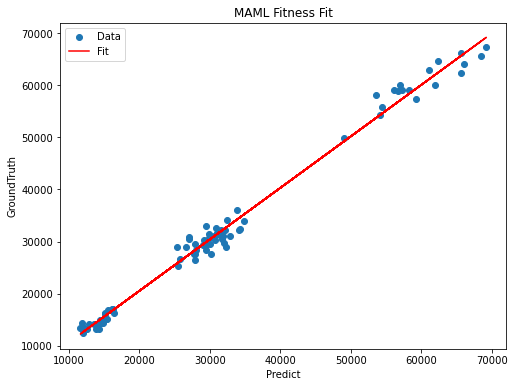

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
x = data['Predict'].values
y = data['GroundTruth'].values
# 回归分析
coef = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coef)
y_fit = fit_fn(x)
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label='Fit')
plt.xlabel('Predict')
plt.ylabel('GroundTruth')
plt.title('MAML Fitness Fit')
plt.legend()
plt.show()

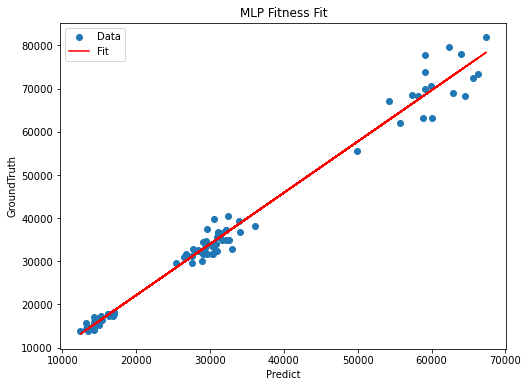

In [7]:
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('./MLP_label.csv')
data
# 生成数据
x = data['Predict'].values
y = data['GroundTruth'].values
# 回归分析
coef = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coef)
y_fit = fit_fn(x)
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label='Fit')
plt.xlabel('Predict')
plt.ylabel('GroundTruth')
plt.title('MLP Fitness Fit')
plt.legend()
plt.show()